<a href="https://colab.research.google.com/github/skathish03/bytsdaily/blob/main/kmeans_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def initialize_centroids(X,k):
  indices = np.random.choice(len(X), k, replace=False)
  return X[indices]

In [3]:
def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


In [4]:
def update_centroids(X,labels,k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [5]:
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        labels = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [9]:
x =pd.read_csv("/content/Iris (1).csv")
x=x.iloc[:,1:-1].values
k=5
labels,centroids=k_means(x,k)

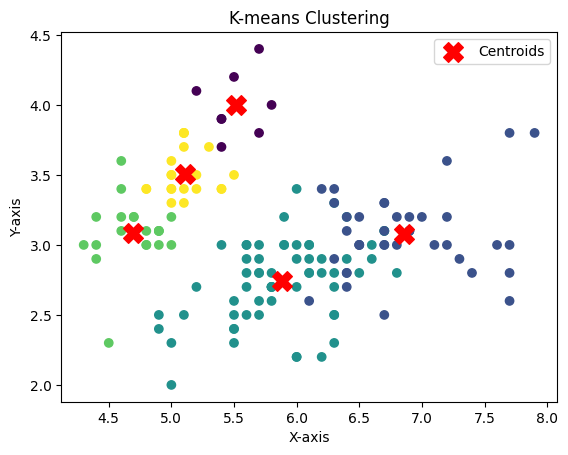

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()